In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

2024-02-27 22:21:36.077034: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:21:36.119456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 22:21:36.119526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 22:21:36.121161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 22:21:36.128893: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:21:36.137051: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(20, kernel_initializer='normal'))
dnn_model.add(Dense(6,activation='softmax'))
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# history = dnn_model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[monitor],verbose=2,epochs=20,batch_size=1000) 
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=1000,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 22:21:39.959664: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 22:21:39.990012: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 22:21:40.013872: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_3/bias/v/Assign' id:341 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_3/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_3/bias/v, training/Adam/dense_3/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model

Test accuracy: 0.8645282


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 22:21:46.842138: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_3/Softmax' id:94 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


start


EAD: 100%|██████████| 194/194 [30:38<00:00,  9.48s/it]


lr = 0.001
FPR: [2.14874814e-01 3.55737133e-01 1.00902064e-04 1.10148839e-01
 2.04609840e-01 3.76985155e-02]
TPR: [0.05837738 0.70547893 0.         0.01752654 0.00457596 0.        ]
FNR: [0.94162262 0.29452107 1.         0.98247346 0.99542404 1.        ]
TNR: [0.78512519 0.64426287 0.9998991  0.88985116 0.79539016 0.96230148]
Accuracy: 0.2891227716789203
Precision(micro,macro,weighted): 0.2891227716789203,0.11884275234242768,0.29065695031068767
F1(micro,macro,weighted: 0.2891227716789203,0.11313174284697457,0.2628773120712759
FPR: 0.15386167406671572
tpr: 0.13099313555237782
fnr: 0.8690068644476222
tnr: 0.8461383259332842


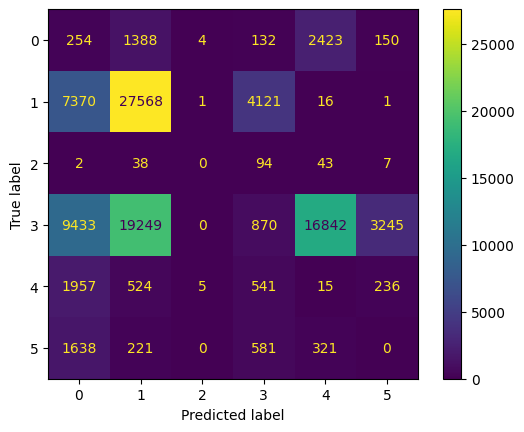

EAD: 100%|██████████| 194/194 [30:33<00:00,  9.45s/it]


lr = 0.1
FPR: [2.08354838e-01 3.82558584e-01 1.00902064e-04 1.04549757e-01
 1.83654127e-01 5.47607455e-02]
TPR: [0.05837738 0.70245925 0.         0.01303411 0.00091519 0.        ]
FNR: [0.94162262 0.29754075 1.         0.98696589 0.99908481 1.        ]
TNR: [0.79164516 0.61744142 0.9998991  0.89545024 0.81634587 0.94523925]
Accuracy: 0.28556752945916003
Precision(micro,macro,weighted): 0.28556752945916003,0.11123323413435737,0.2699583783465405
F1(micro,macro,weighted: 0.28556752945916003,0.10957111337076313,0.25383172014645816
FPR: 0.1556631589129782
tpr: 0.12913098834570644
fnr: 0.8708690116542935
tnr: 0.8443368410870219


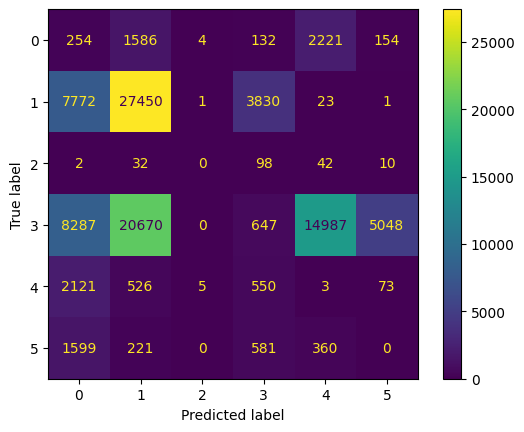

done


In [4]:
print("start")
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import ElasticNet

lr_v = [0.001, 0.01, 0.1]

# Iterate over epsilon values
for lr in lr_v:
    # Craft adversarial samples with FGSM
    adv_crafter = ElasticNet(classifier, learning_rate=lr, batch_size = 512)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"lr = {lr}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "en",
        "lr" : lr,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/modeldnn.csv", mode='a', index=False)

print("done")
